In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# Import pandas and matplotlib libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np

In [3]:
# Read the data frame from a csv file
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metal-Loss-data.csv')

In [4]:

# Define a function that takes a string in the format of HH:MM
def clock_angle(time):
    # Split the string by colon and convert to integers
    hour, minute = map(int, time.split(":"))
    # Calculate the angle in degrees
    angle = (((hour*60 + minute)/2))%360

    # Adjust the angle to start from the vertical axis

    angle = (450 - angle)%360

    # Return the angle value in degrees
    return angle

# Test the function with some
print(clock_angle("12:00")) # 90
print(clock_angle("03:00")) # 0
print(clock_angle("06:00")) # 270
print(clock_angle("09:00")) # 180
print(clock_angle("11:50"))

90.0
0.0
270.0
180.0
95.0


In [5]:
df.head()

,Depth,subcategory,start,end,category
0,8,Pitting,11:27,11:31,Ext
1,11,Pitting,09:06,09:22,Ext
2,8,General,09:57,10:13,Ext
3,10,General,07:44,07:56,Ext
4,6,Pitting,11:27,11:31,Ext


In [6]:
df['start']=df['start'].apply(clock_angle)
df['end']=df['end'].apply(clock_angle)

In [7]:
df.head()

,Depth,subcategory,start,end,category
0,8,Pitting,106.5,104.5,Ext
1,11,Pitting,177.0,169.0,Ext
2,8,General,151.5,143.5,Ext
3,10,General,218.0,212.0,Ext
4,6,Pitting,106.5,104.5,Ext


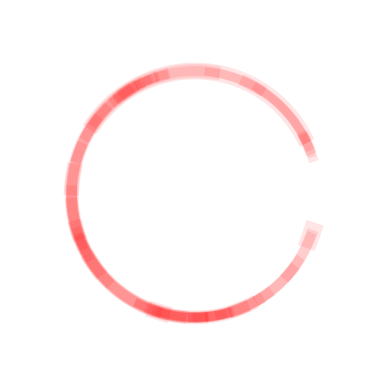

In [8]:
# Create a figure and axis
fig, ax = plt.subplots()

# Loop through each row in the dataframe
for index, row in df.iterrows():
    start = row['start']
    end = row['end']
    depth = row['Depth']

    # Calculate the angle range
    angle_range = np.linspace(np.radians(start), np.radians(end), 1000)

    # Calculate the arc thickness
    arc_thickness = depth

    # Plot the arc
    plt.plot(np.cos(angle_range), np.sin(angle_range), color='red', alpha=0.1, linewidth=arc_thickness)

# Set the aspect ratio to equal
ax.set_aspect('equal')

# Set the x and y limits
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

# Hide the axis labels
ax.axis('off')
plt.savefig("mySVG.svg")
# Show the plot
plt.show()